In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath
from scipy.io import loadmat
import mat73
from xgcm import Grid

In [2]:
## Read in .mat files as python dictionaries
## Dictionaries are used to store data in key:value pairs
## A collection which is ordered.
dict_uvel = mat73.loadmat('/archive/Rebecca.Beadling/SOSE_to_transfer_new/UvelForEllyn.mat')
dict_grid = mat73.loadmat('/archive/Rebecca.Beadling/SOSE_to_transfer_new/grid.mat')

In [3]:
dict_uvel["yc"].shape
dict_grid["XG"].shape

(4320, 1260)

In [4]:
uvel = xr.DataArray(dict_uvel["U"],dims={"xg":dict_uvel["xg"], "yc":dict_uvel["yc"], "z":dict_uvel["z"]})
uvel = uvel.assign_coords({"xg":dict_uvel["xg"], "yc":dict_uvel["yc"], "z":dict_uvel["z"]})
uvel = uvel.transpose("z","yc","xg")

### Need to slice Depth to 643 points
sose_depth = xr.DataArray(dict_grid["Depth"],dims={"xg":uvel["xg"], "yc":uvel["yc"]})
sose_depth = sose_depth.transpose("yc","xg")
## Slice depth before I assign coords
sose_depth_slice = sose_depth.isel(yc=slice(0,643))
sose_depth_slice = sose_depth_slice.assign_coords({"xg":uvel["xg"],"yc":uvel["yc"]})

In [44]:
## Put into single dataset
uvel_vvel_arrays = xr.Dataset({'uvel':uvel,'vvel':vvel},coords={'xg':uvel['xg'],'xc':vvel['xc'],'yg':uvel['xg'],'yc':vvel['xc']})
uvel_vvel_arrays

NameError: name 'vvel' is not defined

In [51]:
### Compute speed. SOSE is on an Arakawa-C grid, so the u and v components
### of velocity are not located on the same grid indices.

### Will need to interoplate one onto the other position.
### Create xgcm grid object:
grid = Grid(uvel_vvel_arrays, coords = {'X':{'center':'xc','left':'xg'},
                                        'Y':{'center':'yc','left':'yg'},
                                        'Z':{'center':'Z'}}, periodic=['X','Y'])
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   xc --> left
  * left     xg --> center
Y Axis (periodic, boundary=None):
  * center   yc --> left
  * left     yg --> center
Z Axis (not periodic, boundary=None):
  * center   Z

In [52]:
display(uvel_vvel_arrays.vvel.dims)
display(uvel_vvel_arrays.uvel.dims)

('z', 'yg', 'xc')

('z', 'yc', 'xg')

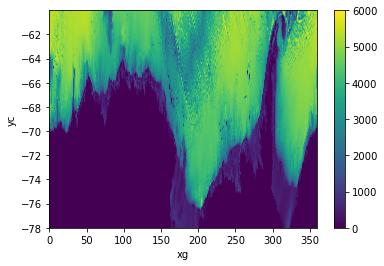

In [14]:
sose_depth_slice.plot()

In [5]:
## ##define asc regions
## 20E
asc_20e = uvel.sel(yc=slice(-70.5,-68)).sel(xg=20,method='nearest')

##150E
asc_150e = uvel.sel(yc=slice(-69,-65.2)).sel(xg=150,method='nearest')

##130W
asc_130W = uvel.sel(yc=slice(-75,-72)).sel(xg=230,method='nearest')

#80W
asc_80W = uvel.sel(yc=slice(-74,-68)).sel(xg=280,method='nearest')


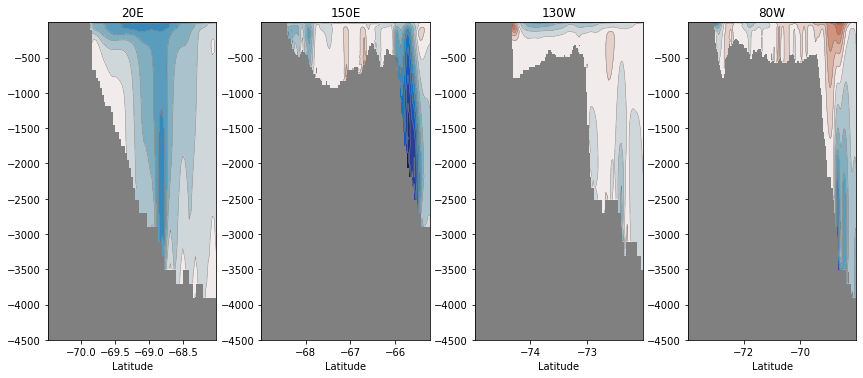

In [6]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,5),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

asc_20e.where(asc_20e != 0).sel(z=slice(-1,-4500)).plot.contourf(ax=ax1,
                                    levels=20,cmap=cmocean.cm.balance,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False)
asc_20e.where(asc_20e != 0).sel(z=slice(-1,-4500)).plot.contour(ax=ax1,
                                   levels=20,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False,colors='gray',linestyles='-',linewidths=0.5)
ax1.set_title('20E')
ax1.set_ylabel('')
ax1.set_xlabel('Latitude')

asc_150e.where(asc_150e != 0).sel(z=slice(-1,-4500)).plot.contourf(ax=ax2,
                                    levels=20,cmap=cmocean.cm.balance,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False)
asc_150e.where(asc_150e != 0).sel(z=slice(-1,-4500)).plot.contour(ax=ax2,
                                    levels=20,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False,colors='gray',linestyles='-',linewidths=0.5)
ax2.set_title('150E')
ax2.set_ylabel('')
ax2.set_xlabel('Latitude')


asc_130W.where(asc_130W != 0).sel(z=slice(-1,-4500)).plot.contourf(ax=ax3,
                                    levels=20,cmap=cmocean.cm.balance,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False)
asc_130W.where(asc_130W != 0).sel(z=slice(-1,-4500)).plot.contour(ax=ax3,
                                    levels=20,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False,colors='gray',linestyles='-',linewidths=0.5)
ax3.set_title('130W')
ax3.set_ylabel('')
ax3.set_xlabel('Latitude')


asc_80W.where(asc_80W != 0).sel(z=slice(-1,-4500)).plot.contourf(ax=ax4,
                                    levels=20,cmap=cmocean.cm.balance,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False)
asc_80W.where(asc_80W != 0).sel(z=slice(-1,-4500)).plot.contour(ax=ax4,
                                    levels=20,center=0,corner_mask=False,extend='both',
                                    vmin=-0.16,vmax=0.16,add_colorbar=False,colors='gray',linestyles='-',linewidths=0.5)
ax4.set_title('80W')
ax4.set_ylabel('')
ax4.set_xlabel('Latitude')

plt.savefig('SOSE_velocity_cross_sections.pdf')

array(-8.2061025)

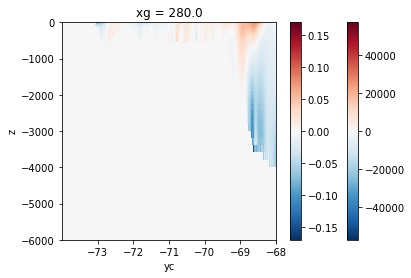

In [45]:
##Compute velocity at each transect:
##To calculate Utransport on the C-grid:
#Utr = U*DYG*DRF*hFaCW

dict_grid["hFacW"].shape   #has three dimensions (x,y,z)
dict_grid["DYG"].shape     #Two dimensions (x,y)
dict_grid["DRF"].shape     #One dimension (z, 104)

### Convert this into DataArrays.
#hFacW
sose_hFacW = xr.DataArray(dict_grid["hFacW"],dims={"xg":uvel["xg"], "yc":uvel["yc"], "z":uvel["z"]})
sose_hFacW = sose_hFacW.transpose("z","yc","xg")
## Slice hFacW before I assign coords
sose_hFacW_slice = sose_hFacW.isel(yc=slice(0,643))
sose_hFacW_slice = sose_hFacW_slice.assign_coords({"xg":uvel["xg"],"yc":uvel["yc"],"z":uvel["z"]})

#DYG
sose_DYG = xr.DataArray(dict_grid["DYG"],dims={"xg":uvel["xg"], "yc":uvel["yc"]})
sose_DYG = sose_DYG.transpose("yc","xg")
## Slice DYG before I assign coords
sose_DYG_slice = sose_DYG.isel(yc=slice(0,643))
sose_DYG_slice = sose_DYG_slice.assign_coords({"xg":uvel["xg"],"yc":uvel["yc"]})

#DRF
sose_DRF = xr.DataArray(dict_grid["DRF"],dims={"z":uvel["z"]})


## Compute transport at 20e:
ASC_20e = uvel.sel(yc=slice(-70.5,-68)).sel(xg=20,method='nearest')
sose_hFacW_slice_20e = sose_hFacW_slice.sel(yc=slice(-70.5,-68)).sel(xg=20,method='nearest')
sose_DYG_slice_20e = sose_DYG_slice.sel(yc=slice(-70.5,-68)).sel(xg=20,method='nearest')

ASC_20e_hFacW = ASC_20e*sose_hFacW_slice_20e
ASC_20e_hFacW_DYG = ASC_20e*sose_hFacW_slice_20e*sose_DYG_slice_20e
ASC_20e_hFacW_DYG_DRF = ASC_20e*sose_hFacW_slice_20e*sose_DYG_slice_20e*sose_DRF

#*sose_DYG_slice*sose_DRF
ASC_20e_hFacW_DYG_DRF.plot()
ASC_20e_Sv = ASC_20e_hFacW_DYG_DRF.sum(dim=['yc','z'])*(1/10**6)
ASC_20e_Sv.values


##150E
asc_150e = uvel.sel(yc=slice(-69,-65.2)).sel(xg=150,method='nearest')

##130W
asc_130W = uvel.sel(yc=slice(-75,-72)).sel(xg=230,method='nearest')

#80W
asc_80W = uvel.sel(yc=slice(-74,-68)).sel(xg=280,method='nearest')


## Compute transport at 150e:
ASC_150e = uvel.sel(yc=slice(-69,-65.2)).sel(xg=150,method='nearest')
sose_hFacW_slice_150e = sose_hFacW_slice.sel(yc=slice(-69,-65.2)).sel(xg=150,method='nearest')
sose_DYG_slice_150e = sose_DYG_slice.sel(yc=slice(-69,-65.2)).sel(xg=150,method='nearest')

ASC_150e_hFacW = ASC_150e*sose_hFacW_slice_150e
ASC_150e_hFacW_DYG = ASC_150e*sose_hFacW_slice_150e*sose_DYG_slice_150e
ASC_150e_hFacW_DYG_DRF = ASC_150e*sose_hFacW_slice_150e*sose_DYG_slice_150e*sose_DRF

#*sose_DYG_slice*sose_DRF
#ASC_150e_hFacW_DYG_DRF.plot()
ASC_150e_Sv = ASC_150e_hFacW_DYG_DRF.sum(dim=['yc','z'])*(1/10**6)
ASC_150e_Sv.values

## Compute transport at 150e:
ASC_130W = uvel.sel(yc=slice(-75,-72)).sel(xg=230,method='nearest')
sose_hFacW_slice_130W = sose_hFacW_slice.sel(yc=slice(-75,-72)).sel(xg=230,method='nearest')
sose_DYG_slice_130W = sose_DYG_slice.sel(yc=slice(-75,-72)).sel(xg=230,method='nearest')

ASC_130W_hFacW = ASC_130W*sose_hFacW_slice_130W
ASC_130W_hFacW_DYG = ASC_130W*sose_hFacW_slice_130W*sose_DYG_slice_130W
ASC_130W_hFacW_DYG_DRF = ASC_130W*sose_hFacW_slice_130W*sose_DYG_slice_130W*sose_DRF

#*sose_DYG_slice*sose_DRF
#ASC_130W_hFacW_DYG_DRF.plot()
ASC_130W_Sv = ASC_130W_hFacW_DYG_DRF.sum(dim=['yc','z'])*(1/10**6)
ASC_130W_Sv.values



## Compute transport at 80w:
ASC_80W = uvel.sel(yc=slice(-74,-68)).sel(xg=280,method='nearest')
sose_hFacW_slice_80W = sose_hFacW_slice.sel(yc=slice(-74,-68)).sel(xg=280,method='nearest')
sose_DYG_slice_80W = sose_DYG_slice.sel(yc=slice(-74,-68)).sel(xg=280,method='nearest')

ASC_80W_hFacW = ASC_80W*sose_hFacW_slice_80W
ASC_80W_hFacW_DYG = ASC_80W*sose_hFacW_slice_80W*sose_DYG_slice_80W
ASC_80W_hFacW_DYG_DRF = ASC_80W*sose_hFacW_slice_80W*sose_DYG_slice_80W*sose_DRF

#*sose_DYG_slice*sose_DRF
ASC_80W.plot()
ASC_80W_Sv = ASC_80W_hFacW_DYG_DRF.sum(dim=['yc','z'])*(1/10**6)
ASC_80W_Sv.values